### Markov Chain for Price Movement Simulation

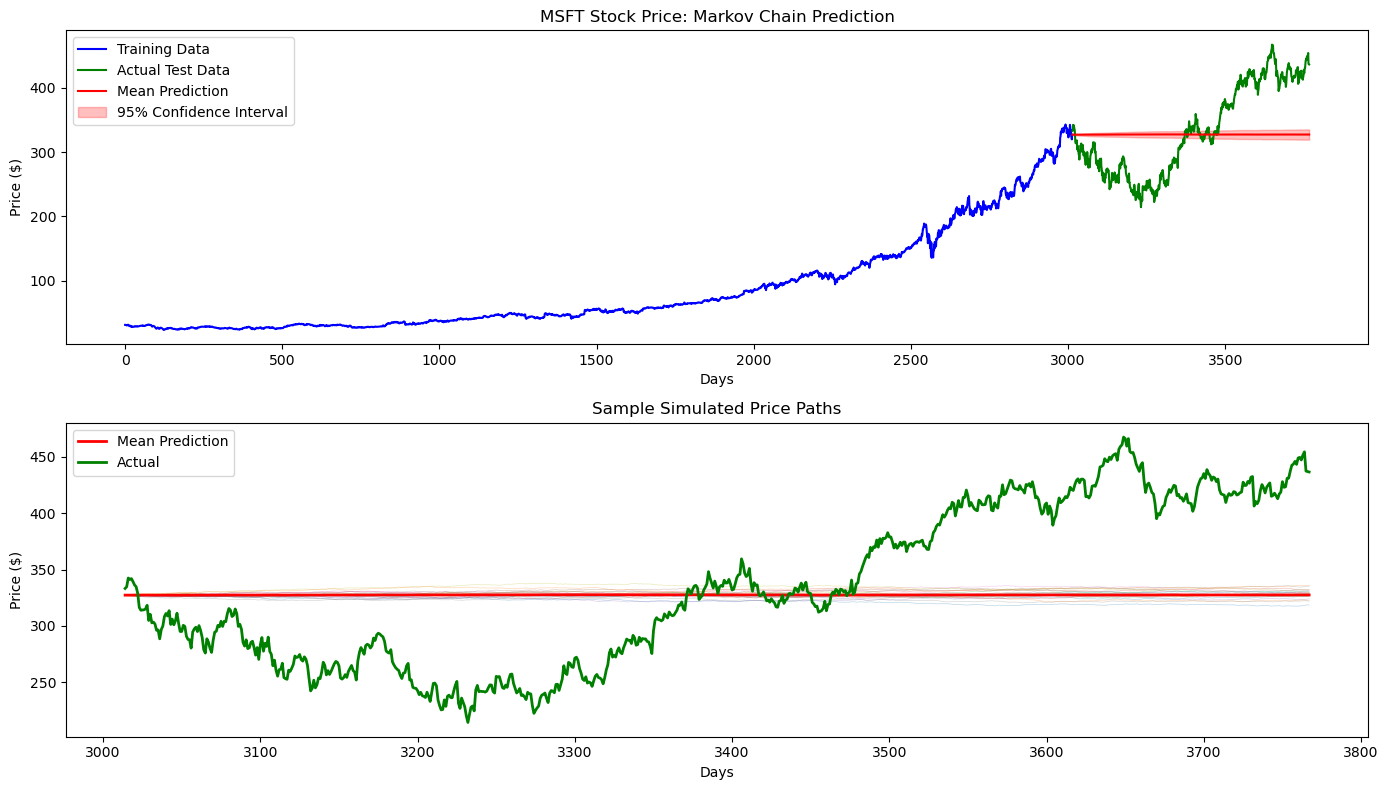

In [20]:
np.random.seed(42)

# Choose a single stock
sym = "MSFT"   
g = stocks.loc[stocks["Symbol"] == sym].copy().sort_values("Date")

prices = g["Close"].astype(float).values
split = int(0.8 * len(prices))
train, test = prices[:split], prices[split:]
h = len(test)

rets = pd.Series(train).pct_change().dropna().values
states, edges = discretize_returns(rets, n_states=5)
P = transition_matrix(states, n_states=5)

last_ret = (train[-1] - train[-2]) / train[-2]
start_state = int(np.digitize(last_ret, edges[1:-1]))

# Simulate 200 paths
n_sims = 200
paths = np.vstack([simulate_path(train[-1], start_state, edges, P, h) for _ in range(n_sims)])
mean_path = paths.mean(axis=0)
std_path = paths.std(axis=0)

x_train = np.arange(len(train))
x_test = np.arange(len(train), len(train) + h)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(x_train, train, "b-", label="Training Data")
plt.plot(x_test, test, "g-", label="Actual Test Data")
plt.plot(x_test, mean_path[1:], "r-", label="Mean Prediction")
plt.fill_between(
    x_test,
    mean_path[1:] - 1.96 * std_path[1:],
    mean_path[1:] + 1.96 * std_path[1:],
    color="red", alpha=0.25, label="95% Confidence Interval"
)
plt.title(f"{sym} Stock Price: Markov Chain Prediction")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()

plt.subplot(2, 1, 2)
for i in range(min(20, n_sims)):
    plt.plot(x_test, paths[i][1:], alpha=0.3, linewidth=0.5)
plt.plot(x_test, mean_path[1:], "r-", linewidth=2, label="Mean Prediction")
plt.plot(x_test, test, "g-", linewidth=2, label="Actual")
plt.title("Sample Simulated Price Paths")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()